# Тесты

In [ ]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time

In [ ]:
def search_dzen_articles(query):
    driver = webdriver.Chrome()
    
    # Открываем страницу dzen.ru/explore
    driver.get("https://dzen.ru/explore")
    time.sleep(3)  # Ожидание для полной загрузки страницы
    
    # Находим поле поиска по атрибуту 'data-testid'
    search_input = driver.find_element(By.CSS_SELECTOR, "input[data-testid='search-input']")
    
    # Вводим текст запроса в поле поиска
    search_input.send_keys(query)
    time.sleep(1)  # Небольшая пауза после ввода текста
    
    # Находим и нажимаем кнопку поиска
    search_button = driver.find_element(By.CSS_SELECTOR, "div[data-testid='search-button-desktop']")
    search_button.click()
    
    # Ожидаем загрузку результатов поиска
    time.sleep(3)
    
    # Явное ожидание кнопки "Статьи и Посты"
    try:
        # Используем явное ожидание, чтобы убедиться, что кнопка появилась
        articles_tab = WebDriverWait(driver, 10).until(
            EC.element_to_be_clickable((By.CSS_SELECTOR, "button[data-testid='article,brief']"))
        )
        # Переходим на вкладку "Статьи и Посты"
        articles_tab.click()
        
        # Ожидаем загрузку вкладки с результатами поиска по статьям и постам
        time.sleep(3)
        
        # Извлекаем ссылки на статьи
        links = []
        items = driver.find_elements(By.CSS_SELECTOR, "a.desktop2--card-horizontal-article__cardLink-AC")  # Извлечение ссылок по CSS-селектору
        for item in items[:10]:  # Ограничиваемся первыми 10 ссылками
            link = item.get_attribute('href')
            if link and link.startswith('https://dzen.ru'):
                links.append(link)
        
    except Exception as e:
        print(f"Ошибка: {e}")
        links = []
    
    # Закрываем браузер
    driver.quit()
    
    return links

In [ ]:
# Пример использования
query = "новости технологий"  # Замените на нужный запрос
links = search_dzen_articles(query)
print(links)  # Печатаем список ссылок на статьи для проверки

KeyboardInterrupt: 

# Задача

In [2]:
pip install numpy h5py spacy


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
import requests
from bs4 import BeautifulSoup
import spacy
import time
import numpy as np
from sklearn.cluster import KMeans, AgglomerativeClustering, SpectralClustering
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import urllib.parse
import os
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
import time
import random
import pandas as pd

In [9]:
def get_dishes_from_wikipedia():
    base_url = "https://ru.wikipedia.org"
    url = "https://ru.wikipedia.org/wiki/Категория:Блюда_по_алфавиту"
    dishes = []

    while url:
        response = requests.get(url)
        if response.status_code == 200:
            soup = BeautifulSoup(response.text, 'html.parser')

            category_div = soup.find('div', class_='mw-category mw-category-columns')

            if category_div:
                list_items = category_div.find_all('li')
                for li in list_items:
                    a_tag = li.find('a', href=True)
                    if a_tag and a_tag.get('title'):
                        dishes.append(a_tag.get('title'))

            next_page_link = soup.find('a', string='Следующая страница')
            if next_page_link:
                url = base_url + next_page_link.get('href')
            else:
                break
        else:
            print(f"Ошибка при получении данных с {url}")
            break

        time.sleep(1)

    return dishes

In [10]:
dishes = get_dishes_from_wikipedia()
dishes

['Абон',
 'Абрикосовые клёцки',
 'Абхазури',
 'Авголемоно',
 'Агнес Бернауэр (торт)',
 'Агуапанела',
 'Агуачиле',
 'Агэмоти',
 'Аджапсандали',
 'Аджика',
 'Аджилы эзме',
 'Адобо (филиппинская кухня)',
 'Азу',
 'Айвар',
 'Айвовый мармелад',
 'Айвовый хлеб',
 'Айнтопф',
 'Айоли',
 'Айсбайн',
 'Аканес',
 'Акараже',
 'Аквакотта',
 'Аки и солёная рыба',
 'Акутак',
 'Алани',
 'Алетрия',
 'Алиго',
 'Алйотта',
 'Аль пастор',
 'Альба (блюдо)',
 'Альмогроте',
 'Альфахор',
 'Альята',
 'Аманатто',
 'Амаретто (печенье)',
 'Амасти',
 'Аматричана',
 'Американское парфе',
 'Амич',
 'Аммицу',
 'Ампо (блюдо)',
 'Ан-пан',
 'Ангелы на лошадях',
 'Английский крем',
 'Английский маффин',
 'Английский пирог с миногами',
 'Ангулас',
 'Андалузский соус',
 'Андуйет',
 'Анзак (печенье)',
 'Анис де Флавиньи',
 'Анковский пирог',
 'Аннин-тофу',
 'Антикучо',
 'Антипасто',
 'Антрекот',
 'Аньолотти',
 'Аодзиру',
 'Апио (блюдо)',
 'Апфелькюхле',
 'Аранчини',
 'Арахисовое рагу',
 'Арахисовый пирог',
 'Арахисовый соус',

In [11]:
def initialize_browser():
    driver = webdriver.Chrome()
    driver.get("https://ya.ru/")
    time.sleep(2)
    return driver

In [12]:
def search_yandex(driver, query):
    time.sleep(random.uniform(15, 30))
    try:
        # Находим поле ввода поиска
        search_input = driver.find_element(By.NAME, 'text')
        search_input.clear()
        search_input.send_keys(query)

        search_input.send_keys(Keys.RETURN)

        time.sleep(3)

        links = []
        results = driver.find_elements(By.CSS_SELECTOR, 'a.organic__url')

        for result in results:
            link = result.get_attribute('href')
            if link and link.startswith('http'):
                links.append(link)
            if len(links) == 10:
                break

        return links

    except Exception as e:
        print(f"Ошибка: {e}")
        return []

In [13]:
def collect_links_for_cities(cities):
    driver = initialize_browser()
    
    city_links = {}
    for city in cities:
        print(f"Сбор ссылок для города: {city}")
        query = f"блюда {city}"
        links = search_yandex(driver, query)
        city_links[city] = links

    driver.quit()
    return city_links

In [14]:
cities = ["Пермь", "Казань", "Москва", "Уфа", "Санкт-Петербург", "Новосибирск", "Владивосток", "Красноярск", "Ростов-на-Дону", "Ярославль", "Хабаровск", "Сочи"]
city_links = collect_links_for_cities(cities)
city_links

Сбор ссылок для города: Пермь
Сбор ссылок для города: Казань
Сбор ссылок для города: Москва
Сбор ссылок для города: Уфа
Сбор ссылок для города: Санкт-Петербург
Сбор ссылок для города: Новосибирск
Сбор ссылок для города: Владивосток
Сбор ссылок для города: Красноярск
Сбор ссылок для города: Ростов-на-Дону
Сбор ссылок для города: Ярославль
Сбор ссылок для города: Хабаровск
Сбор ссылок для города: Сочи


{'Пермь': ['https://yabs.yandex.ru/count/WdSejI_zOoVX2Lcb0aqJ0ADYWisuCyGl27X1C46Vp-NEdkrtxhpXpjVlUBtX3dT641BLcfJ3McHKb2D7LOYQuxQVjstdE7v3SrI5Zd8G8LcLRgbq2erEOFTWy9F112YW87fGfF21WXXnIwLvrFcKKglMn1qmPVC07GKEc2wWLCBGv1aTW8D1np6cpgn9rI2U4n6ThQ_ovOYKb2mbNoOFP9KKe7qWorU0ze5iaWAq3sJr2j2Y0CEIypK1_XnaG0LOpkcsW0eYv4FOV_1w3rndNbE7QaYbqgXjGwNJ9sxdUFwKudPjuyxdr7bBRpkVFc-flG87QuFhYX8UQ4a8Vznucrib93fCpkSR9XjlDO0DN0N2NdznPjmX9bTVQiGvJBgkr-WSeDZCk3-i4hSqN4-pbNBVzttV0NnXy89VMFM8qhN3EvDYOUk0hZFDaEcm9Wyz2jksEZs6tDInO2PTtsF4FaRtC6QORv1KAu9468O6fljYHuNYZomQWffwrIQtsjnn-gZq7px26zC_U6bO5lY_FcDEt-ipvlIv5I3n-hk5AK6uNqix7RBzBErqoCOq-oE3pB8_CWX4hqBMK9RKwLr3MLAdjymxN_O-pfwwFDcBJTNj-J7jmGWm1Rfj_PS4GCMjFR-bTLtt0gYujUUr7WdLavdEPxtN_MEInoUEKN5gsYEQcIkLIgMC5Ky0s5xNTGnB8SgVGTnWc9GCIe067loZVeQMPyrj7FdsVITRm93P_9hMVJpgfddVFew1QWpcoanGWKjPqriAz19euzkFfmiYgPd6OlHuq_shzjYNdQ7wpOkDwRetFAotHFAiIuEguX0MiKLp9R9o3q_E~2?etext=2202.w8gqJcXe3lifewKwlEMffN5DPluMK8nL1Ax86NF3iNRwb3ZjY2ZibmRiY2JwYXl1.29206a0aa976d2e191c9e2d36cbca6e97a4e

In [27]:
nlp = spacy.load('ru_core_news_sm')
def lemmatize_text(text):
    doc = nlp(text)
    return set([token.lemma_ for token in doc if token.pos_ in ('NOUN', 'PROPN')])

In [28]:
def split_text(text):
    sentences = text.split(' ')

    chunks = []
    current_chunk = []
    current_length = 0

    for word in sentences:
        current_chunk.append(word)
        current_length += len(word)
        
        if current_length > 10000:
            chunks.append(' '.join(current_chunk))
            current_chunk = []
            current_length = 0

    if current_chunk:
        chunks.append(' '.join(current_chunk))

    return chunks

In [29]:
def fetch_page(url, retries=3, timeout=20):
    for attempt in range(retries):
        try:
            response = requests.get(url, timeout=timeout)
            response.raise_for_status()
            return response
        except requests.exceptions.Timeout:
            print(f"Попытка {attempt + 1} не удалась из-за тайм-аута.")
            time.sleep(2)
        except requests.exceptions.RequestException as e:
            print(f"Ошибка запроса: {e}")
            break
    return None

In [30]:
def find_dishes_in_page(url, dishes):
    response = fetch_page(url)
    if response is None:
        print(f"Ошибка при получении данных с {url}")
        return {}

    soup = BeautifulSoup(response.text, 'html.parser')
    page_text = soup.get_text()

    text_chunks = split_text(page_text)

    lemmatized_text = set()
    for chunk in text_chunks:
        lemmatized_text.update(lemmatize_text(chunk))

    dish_counts = {dish: 0 for dish in dishes}

    for dish in dishes:
        dish_lemma = lemmatize_text(dish)
        if dish_lemma.intersection(lemmatized_text):
            dish_counts[dish] += 1

    return dish_counts

In [31]:
def normalize_frequencies(dish_counts, total_pages):
    normalized_frequencies = {dish: count / total_pages if total_pages > 0 else 0
                              for dish, count in dish_counts.items()}
    return normalized_frequencies

In [32]:
def process_city_links(city_links, dishes):
    city_dishes = {}
    for city, links in city_links.items():
        print(f"Обработка данных для города: {city}")
        dish_counts = {dish: 0 for dish in dishes}

        for link in links:
            print(f"Обработка страницы: {link}")
            page_dish_counts = find_dishes_in_page(link, dishes)
            for dish, count in page_dish_counts.items():
                dish_counts[dish] += count

        normalized_frequencies = normalize_frequencies(dish_counts, len(links))
        city_dishes[city] = normalized_frequencies

    return city_dishes

In [33]:
city_dishes = {}
city_dishes = process_city_links(city_links, dishes)
city_dishes

Обработка данных для города: Пермь
Обработка страницы: https://yabs.yandex.ru/count/WdSejI_zOoVX2Lcb0aqJ0ADYWisuCyGl27X1C46Vp-NEdkrtxhpXpjVlUBtX3dT641BLcfJ3McHKb2D7LOYQuxQVjstdE7v3SrI5Zd8G8LcLRgbq2erEOFTWy9F112YW87fGfF21WXXnIwLvrFcKKglMn1qmPVC07GKEc2wWLCBGv1aTW8D1np6cpgn9rI2U4n6ThQ_ovOYKb2mbNoOFP9KKe7qWorU0ze5iaWAq3sJr2j2Y0CEIypK1_XnaG0LOpkcsW0eYv4FOV_1w3rndNbE7QaYbqgXjGwNJ9sxdUFwKudPjuyxdr7bBRpkVFc-flG87QuFhYX8UQ4a8Vznucrib93fCpkSR9XjlDO0DN0N2NdznPjmX9bTVQiGvJBgkr-WSeDZCk3-i4hSqN4-pbNBVzttV0NnXy89VMFM8qhN3EvDYOUk0hZFDaEcm9Wyz2jksEZs6tDInO2PTtsF4FaRtC6QORv1KAu9468O6fljYHuNYZomQWffwrIQtsjnn-gZq7px26zC_U6bO5lY_FcDEt-ipvlIv5I3n-hk5AK6uNqix7RBzBErqoCOq-oE3pB8_CWX4hqBMK9RKwLr3MLAdjymxN_O-pfwwFDcBJTNj-J7jmGWm1Rfj_PS4GCMjFR-bTLtt0gYujUUr7WdLavdEPxtN_MEInoUEKN5gsYEQcIkLIgMC5Ky0s5xNTGnB8SgVGTnWc9GCIe067loZVeQMPyrj7FdsVITRm93P_9hMVJpgfddVFew1QWpcoanGWKjPqriAz19euzkFfmiYgPd6OlHuq_shzjYNdQ7wpOkDwRetFAotHFAiIuEguX0MiKLp9R9o3q_E~2?etext=2202.w8gqJcXe3lifewKwlEMffN5DPluMK8nL1Ax86NF3iNRwb3ZjY2ZibmRiY2

{'Пермь': {'Абон': 0.0,
  'Абрикосовые клёцки': 0.0,
  'Абхазури': 0.0,
  'Авголемоно': 0.0,
  'Агнес Бернауэр (торт)': 0.0,
  'Агуапанела': 0.0,
  'Агуачиле': 0.0,
  'Агэмоти': 0.0,
  'Аджапсандали': 0.0,
  'Аджика': 0.0,
  'Аджилы эзме': 0.0,
  'Адобо (филиппинская кухня)': 0.3,
  'Азу': 0.0,
  'Айвар': 0.0,
  'Айвовый мармелад': 0.1,
  'Айвовый хлеб': 0.2,
  'Айнтопф': 0.0,
  'Айоли': 0.0,
  'Айсбайн': 0.0,
  'Аканес': 0.0,
  'Акараже': 0.0,
  'Аквакотта': 0.0,
  'Аки и солёная рыба': 0.2,
  'Акутак': 0.0,
  'Алани': 0.0,
  'Алетрия': 0.0,
  'Алиго': 0.0,
  'Алйотта': 0.0,
  'Аль пастор': 0.0,
  'Альба (блюдо)': 0.5,
  'Альмогроте': 0.0,
  'Альфахор': 0.0,
  'Альята': 0.0,
  'Аманатто': 0.0,
  'Амаретто (печенье)': 0.1,
  'Амасти': 0.0,
  'Аматричана': 0.0,
  'Американское парфе': 0.0,
  'Амич': 0.0,
  'Аммицу': 0.0,
  'Ампо (блюдо)': 0.5,
  'Ан-пан': 0.5,
  'Ангелы на лошадях': 0.0,
  'Английский крем': 0.3,
  'Английский маффин': 0.0,
  'Английский пирог с миногами': 0.3,
  'Ангул

In [34]:
all_dishes = sorted(set(dish for dishes in city_dishes.values() for dish in dishes))
city_vectors = pd.DataFrame([
    [city_dishes[city].get(dish, 0) for dish in all_dishes] for city in city_dishes
], index=city_dishes.keys(), columns=all_dishes)

In [35]:
city_vectors

,Blote billetjes in het gras,Cocio,Cup Noodles,Jelly Babies,LPG-пирог,Mon Chéri,Ёжик из метта,Ёкан,Абон,Абрикосовые клёцки,...,Ямайский пирожок,Янтык (блюдо),Японский суфле-чизкейк,Японское карри,Япчик,Ясса (блюдо),Ятернице,Яхния,Яцухаси,Ячневая каша
Пермь,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,...,0.4,0.5,0.5,0.0,0.0,0.5,0.0,0.0,0.0,0.3
Казань,0.0,0.0,0.0,0.0,0.6,0.0,0.0,0.0,0.0,0.0,...,0.5,0.6,0.6,0.0,0.0,0.6,0.0,0.0,0.0,0.4
Москва,0.0,0.0,0.0,0.0,0.6,0.0,0.0,0.0,0.0,0.0,...,0.2,0.6,0.6,0.0,0.0,0.6,0.0,0.0,0.0,0.2
Уфа,0.0,0.0,0.0,0.0,0.4,0.0,0.0,0.0,0.0,0.0,...,0.1,0.4,0.4,0.0,0.0,0.4,0.0,0.0,0.0,0.3
Санкт-Петербург,0.0,0.0,0.0,0.0,0.6,0.0,0.0,0.0,0.0,0.0,...,0.1,0.5,0.6,0.0,0.0,0.5,0.0,0.0,0.0,0.1
Новосибирск,0.0,0.0,0.0,0.0,0.6,0.0,0.0,0.0,0.0,0.0,...,0.2,0.5,0.6,0.0,0.0,0.5,0.0,0.0,0.0,0.1
Владивосток,0.0,0.0,0.0,0.0,0.4,0.0,0.0,0.0,0.0,0.0,...,0.1,0.4,0.4,0.0,0.0,0.4,0.0,0.0,0.0,0.1
Красноярск,0.0,0.0,0.0,0.0,0.4,0.0,0.0,0.0,0.0,0.0,...,0.1,0.4,0.4,0.0,0.0,0.4,0.0,0.0,0.0,0.1
Ростов-на-Дону,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,...,0.1,0.3,0.5,0.0,0.0,0.3,0.0,0.0,0.0,0.1
Ярославль,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,...,0.3,0.4,0.5,0.0,0.0,0.4,0.0,0.0,0.0,0.2


In [36]:
n_clusters = 4

# K-средних
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
city_vectors['kmeans_cluster'] = kmeans.fit_predict(city_vectors)

# Иерархическая кластеризация
agg_clustering = AgglomerativeClustering(n_clusters=n_clusters)
city_vectors['hierarchical_cluster'] = agg_clustering.fit_predict(city_vectors)

# Спектральная кластеризация
spectral_clustering = SpectralClustering(n_clusters=n_clusters, random_state=0, affinity='nearest_neighbors', n_neighbors=3)
city_vectors['spectral_cluster'] = spectral_clustering.fit_predict(city_vectors)

print("Результаты кластеризации:\n", city_vectors[['kmeans_cluster', 'hierarchical_cluster', 'spectral_cluster']])

Результаты кластеризации:
                  kmeans_cluster  hierarchical_cluster  spectral_cluster
Пермь                         1                     1                 2
Казань                        2                     0                 3
Москва                        2                     0                 3
Уфа                           0                     3                 0
Санкт-Петербург               1                     1                 2
Новосибирск                   0                     1                 2
Владивосток                   0                     3                 0
Красноярск                    0                     3                 0
Ростов-на-Дону                3                     2                 1
Ярославль                     3                     2                 1
Хабаровск                     0                     3                 0
Сочи                          3                     2                 1


c:\Users\Max\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


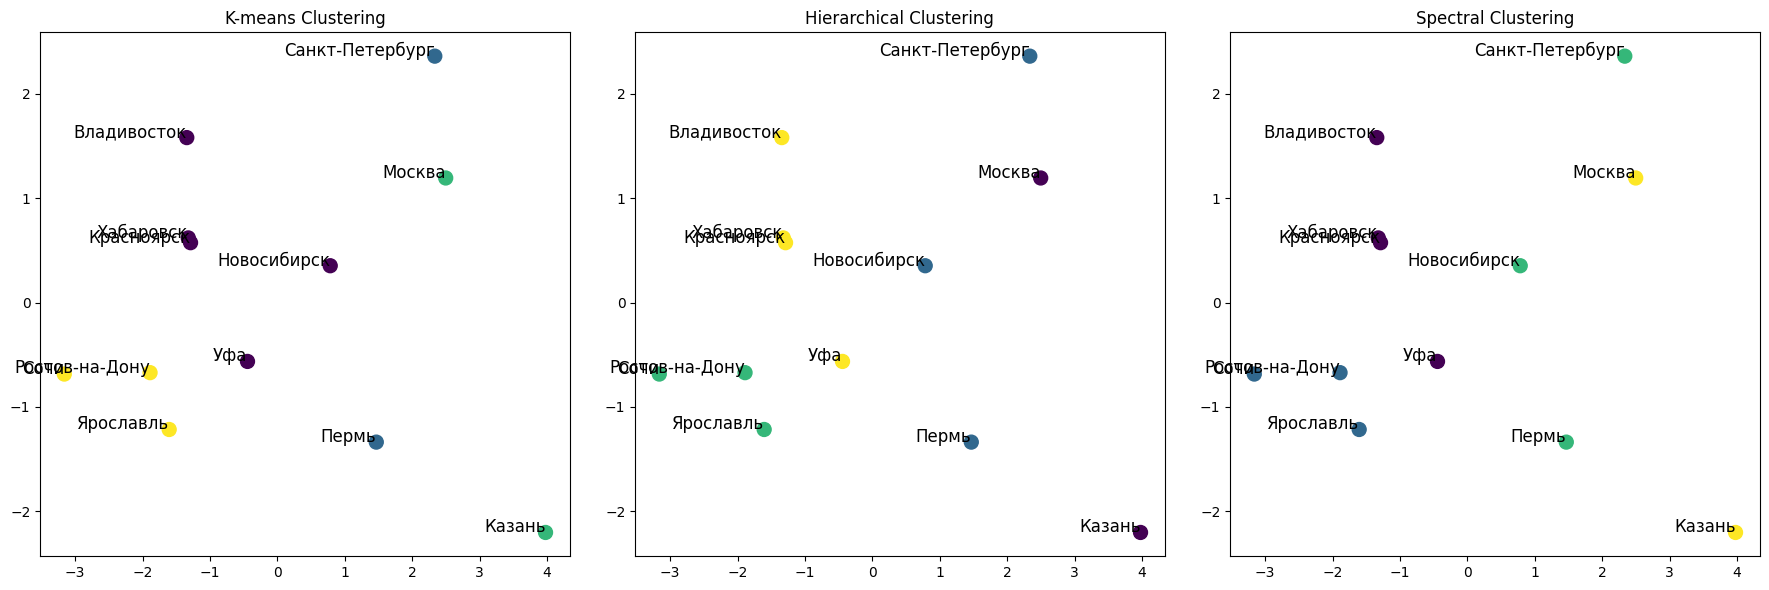

In [37]:
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(city_vectors.drop(columns=['kmeans_cluster', 'hierarchical_cluster', 'spectral_cluster']))

# Создаем фигуру для отображения кластеров
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Визуализируем результаты k-means
axes[0].scatter(reduced_data[:, 0], reduced_data[:, 1], c=city_vectors['kmeans_cluster'], cmap='viridis', s=100)
axes[0].set_title('K-means Clustering')
for i, city in enumerate(city_vectors.index):
    axes[0].text(reduced_data[i, 0], reduced_data[i, 1], city, fontsize=12, ha='right')

# Визуализируем результаты иерархической кластеризации
axes[1].scatter(reduced_data[:, 0], reduced_data[:, 1], c=city_vectors['hierarchical_cluster'], cmap='viridis', s=100)
axes[1].set_title('Hierarchical Clustering')
for i, city in enumerate(city_vectors.index):
    axes[1].text(reduced_data[i, 0], reduced_data[i, 1], city, fontsize=12, ha='right')

# Визуализируем результаты спектральной кластеризации
axes[2].scatter(reduced_data[:, 0], reduced_data[:, 1], c=city_vectors['spectral_cluster'], cmap='viridis', s=100)
axes[2].set_title('Spectral Clustering')
for i, city in enumerate(city_vectors.index):
    axes[2].text(reduced_data[i, 0], reduced_data[i, 1], city, fontsize=12, ha='right')

# Настройка отображения
plt.tight_layout()
plt.show()